https://scipy-lectures.org/packages/scikit-learn/index.html

# Introduction

## What is machine learning?

__Machine Learning__ is about building programs with __tunable parameters__ that are adjusted automatically so as to improve their behavior by adapting to previously seen data.


Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.

## Data in scikit-learn

### The data matrix
Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

- n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
- n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

 The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

### A Simple Example: the Iris Dataset
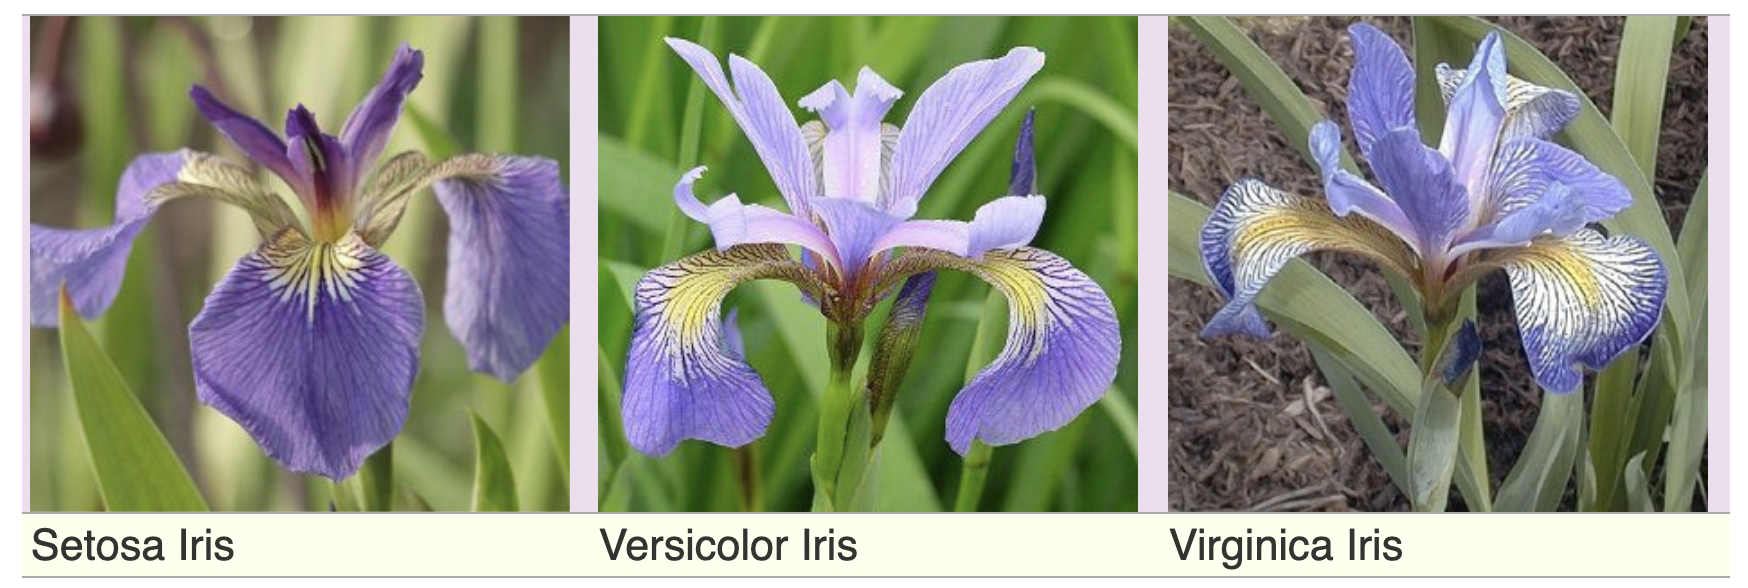

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:

- Features in the Iris dataset:
    - sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)
- Target classes to predict:
    - Setosa Versicolour Virginica

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
n_samples, n_features = iris.data.shape
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
iris.target.shape

(150,)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

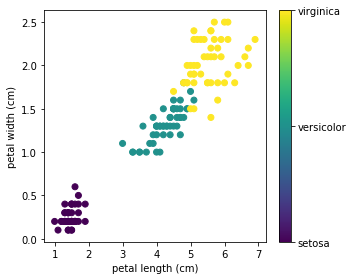

In [12]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

# Basic principles of machine learning with scikit-learn

## Introducing the scikit-learn estimator object
Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: `sklearn.linear_model.LinearRegression`

In [13]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated:

In [14]:
model = LinearRegression(normalize=True)
model.normalize

True

In [15]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [17]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

**Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [18]:
model.coef_

array([1.])

## Supervised Learning: Classification and regression

In __Supervised Learning__, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, __classification__ and __regression__. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

__Classification__: K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [19]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


### Example

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

(4.2, 8.0, 1.9, 4.5)

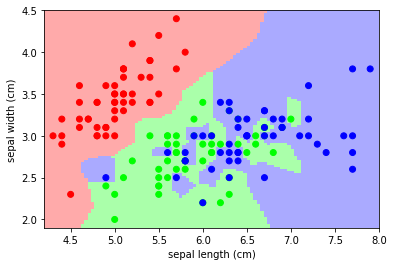

In [21]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

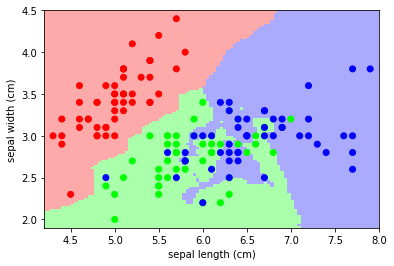

In [21]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

__Regression__: The simplest possible regression setting is the linear regression one:

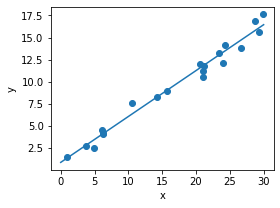

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

## A recap on Scikit-learn’s estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we’ll see examples of these below. Given a scikit-learn estimator object named model, the following methods are available:

__In all Estimators__:
 	
- `model.fit()` : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

__In supervised estimators__:
 	
- `model.predict()` : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.
- `model.predict_proba()` : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
- `model.score()` : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

__In unsupervised estimators__:
 	
- `model.transform()` : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
- `model.fit_transform()` : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Regularization: what it is and why it is necessary

An __example of regularization__ The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ‘’simpler’‘, even if they lead to more errors on the train set.

### Plot fitting a 9th order polynomial

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)

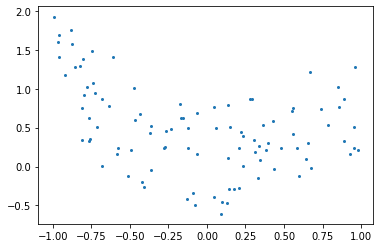

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

Text(0.5, 1.0, 'Fitting a 4th and a 9th order polynomial')

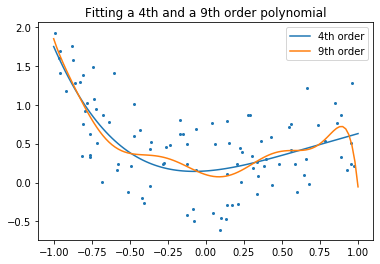

In [29]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

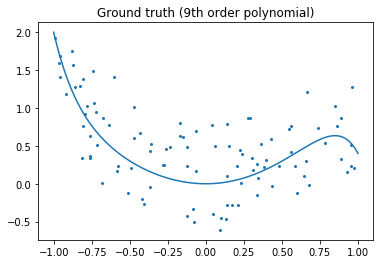

In [52]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

### Simple versus complex models for classification
#### Example of linear and non-linear models

In [25]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import svm

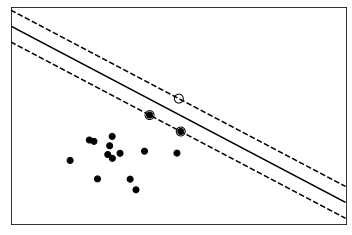

In [34]:
def linear_model(rseed=42, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels


X, y = linear_model()
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone)

ax.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])

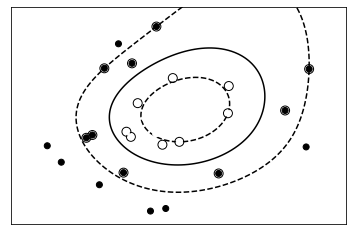

In [124]:
def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()

# Supervised Learning: Classification of Handwritten Digits

## Plot the data: images of digits

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()

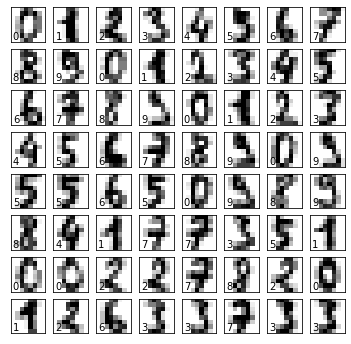

In [54]:
fig = plt.figure(figsize=(6, 6))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

## Visualizing the Data on its principal components
Plot a projection on the 2 first principal axis

A good first-step for many problems is to visualize the data using a Dimensionality Reduction technique. We’ll start with the most straightforward one, __Principal Component Analysis (PCA)__.

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set.

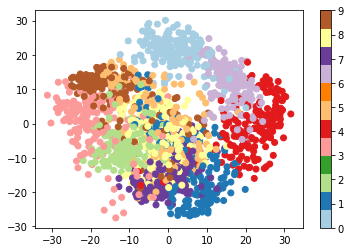

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='Paired') 

plt.colorbar() 

## Gaussian Naive Bayes Classification

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

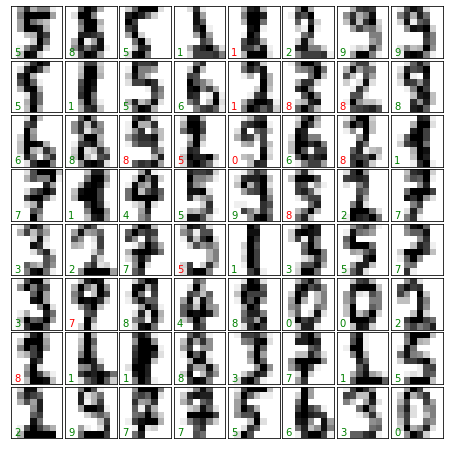

In [61]:
# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red') 

## Quantitative Measurement of Performance

In [62]:
matches = (predicted == expected)
print(matches.sum())

print(len(matches))

matches.sum() / float(len(matches))

378
450


0.84

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the sklearn.metrics submodule.

One of the most useful metrics is the classification_report, which combines several measures and prints a table with the results:

In [65]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.72      0.94      0.82        50
           2       0.96      0.59      0.73        44
           3       0.96      0.81      0.88        62
           4       1.00      0.84      0.92        32
           5       0.87      0.94      0.91        51
           6       0.95      0.92      0.94        39
           7       0.79      1.00      0.88        48
           8       0.57      0.73      0.64        48
           9       0.93      0.63      0.75        41

    accuracy                           0.84       450
   macro avg       0.87      0.84      0.84       450
weighted avg       0.86      0.84      0.84       450



Another enlightening metric for this sort of multi-label classification is a confusion matrix: it helps us visualize which labels are being interchanged in the classification errors:

In [67]:
print(metrics.confusion_matrix(expected, predicted))

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  1  1  1  0]
 [ 0  5 26  1  0  1  1  0 10  0]
 [ 0  1  0 50  0  1  0  1  8  1]
 [ 0  1  0  0 27  0  0  4  0  0]
 [ 0  0  0  0  0 48  0  0  2  1]
 [ 0  0  1  0  0  2 36  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0 10  0  0  0  2  0  1 35  0]
 [ 1  1  0  1  0  1  0  6  5 26]]


# Supervised Learning: Regression of Housing Data

## A quick look at the data

In [68]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)

print(data.target.shape)

(506, 13)
(506,)


In [71]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'count')

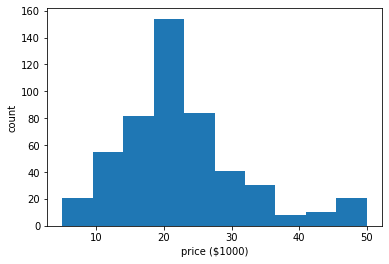

In [76]:
plt.hist(data.target)
plt.xlabel('price ($1000)')
plt.ylabel('count')

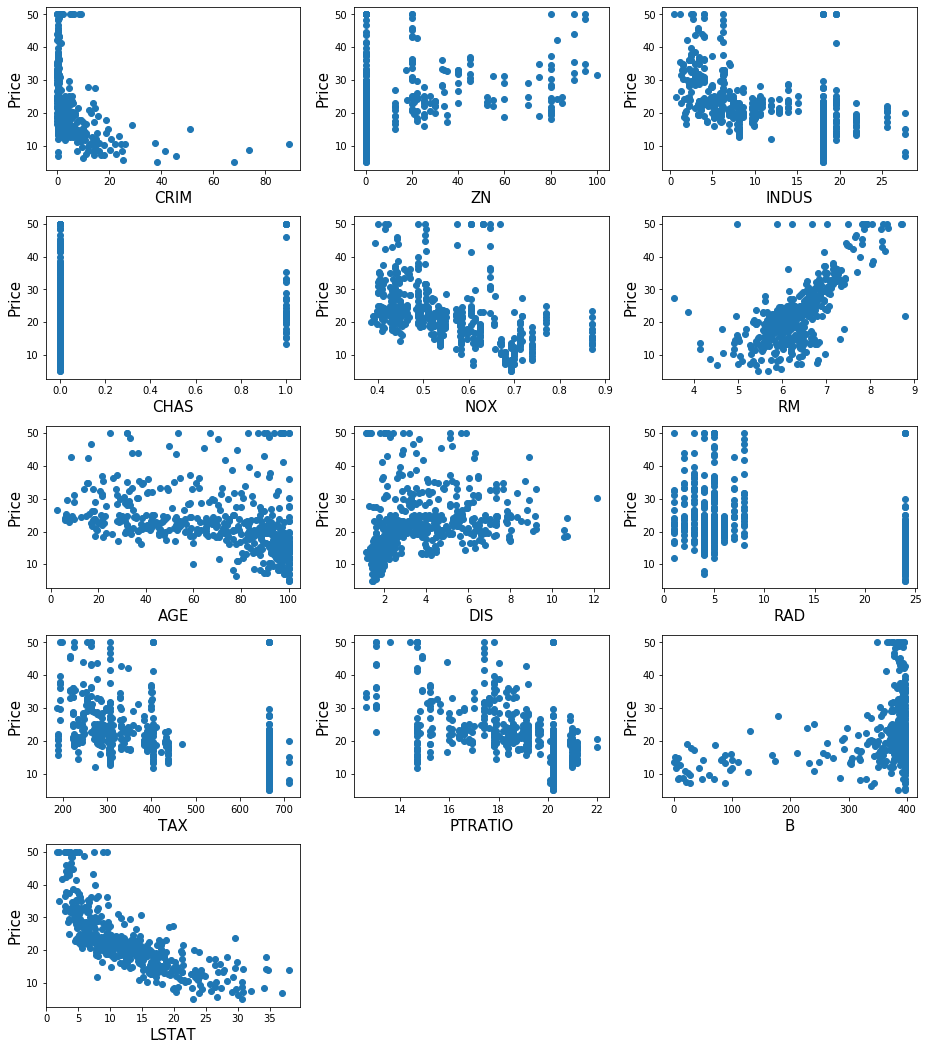

In [97]:
plt.figure(figsize=(13, 20))
for index, feature_name in enumerate(data.feature_names):
    plt.subplot(7, 3, index + 1)
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

## Predicting Home Prices: a Simple Linear Regression
Now we’ll use scikit-learn to perform a simple linear regression on the housing data. There are many possibilities of regressors to use. A particularly simple one is LinearRegression: this is basically a wrapper around an ordinary least squares calculation.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

print("Root Mean Square (RMS) Linear: %s" % np.sqrt(np.mean((predicted - expected) ** 2)))

Root Mean Square (RMS) Linear: 4.514342510988128


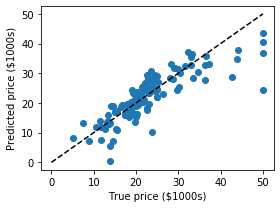

In [99]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model, fit the results, and scatter in vs. out

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

print("RMS GradientBoostingRegressor: %s" % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS GradientBoostingRegressor: 2.4039522342066824


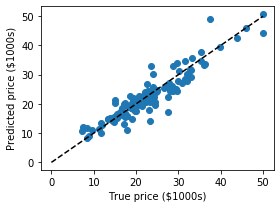

In [107]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

# Measuring prediction performance

## A quick test on the K-neighbors classifier
Here we’ll continue to look at the digits data, but we’ll switch to the K-Neighbors classifier. The K-neighbors classifier is an instance-based classifier. The K-neighbors classifier predicts the label of an unknown point based on the labels of the K nearest points in the parameter space.

In [110]:
# Get the data
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [111]:
# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we’ve found a perfect classifier! But this is misleading for the reasons we saw before: the classifier essentially “memorizes” all the samples it has already seen. To really test how well this algorithm does, we need to try some samples it hasn’t yet seen.

This problem also occurs with regression models. In the following we fit an other instance-based model named “decision tree” to the Boston Housing price dataset we introduced previously:

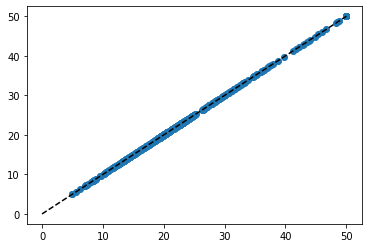

In [112]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

plt.scatter(expected, predicted) 

plt.plot([0, 50], [0, 50], '--k') 

## A correct approach: Using a validation set

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:
- a training set X_train, y_train which is used for learning the parameters of a predictive model
- a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the `train_test_split()` function:

In [114]:
from sklearn import model_selection
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


In [115]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [116]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



The averaged f1-score is often used as a convenient measure of the overall performance of an algorithm. It appears in the bottom row of the classification report; it can also be accessed directly:

In [117]:
metrics.f1_score(y_test, y_pred, average="macro") 

0.9913675218842191

The over-fitting we saw previously can be quantified by computing the f1-score on the training data itself:

In [118]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

## Model Selection via Validation
 We have applied Gaussian Naives, support vectors machines, and K-nearest neighbors classifiers to the digits dataset. Now that we have these validation tools in place, we can ask quantitatively which of the three estimators works best for this dataset.
 
With the default hyper-parameters for each estimator, which gives the best f1 score on the validation set? Recall that hyperparameters are the parameters set when you instantiate the classifier: for example, the n_neighbors in clf = KNeighborsClassifier(n_neighbors=1)

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9366124331966723


/Users/alex/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


For each classifier, which value for the hyperparameters gives the best results for the digits data? For LinearSVC, use loss='l2' and loss='l1'. For KNeighborsClassifier we use n_neighbors between 1 and 10. Note that GaussianNB does not have any adjustable hyperparameters.

In [127]:
from sklearn import model_selection, datasets, metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

In [129]:
for Model in [LinearSVC, GaussianNB, KNeighborsClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

print('------------------')

# test SVC loss
for loss in ['hinge', 'squared_hinge']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}'): {1}".format(loss,
          metrics.f1_score(y_test, y_pred, average="macro")))

print('-------------------')

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={0}): {1}".format(n_neighbors,
        metrics.f1_score(y_test, y_pred, average="macro")))

/Users/alex/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC: 0.9389944120772592
GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
------------------
LinearSVC(loss='hinge'): 0.9367009139385264


/Users/alex/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/alex/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(loss='squared_hinge'): 0.9369281871870513
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


## Cross-validation

Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute score on all these folds. Here we do KFold with k=5.

In [130]:
clf = KNeighborsClassifier()
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [133]:
# We can use different splitting strategies, such as random splitting:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv)  

array([0.96666667, 0.98888889, 0.97777778, 0.99444444, 0.99444444])

## Hyperparameter optimization with cross-validation

Consider regularized linear models, such as Ridge Regression, which uses l2 regularlization, and Lasso Regression, which uses l1 regularization. Choosing their regularization parameter is important.

Let us set these parameters on the Diabetes dataset, a simple regression problem. The diabetes data consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [134]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


In [136]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.4101758336587286
Lasso: 0.3375597834274946


### Basic Hyperparameter Optimization
We compute the cross-validation score as a function of alpha, the strength of the regularization for Lasso and Ridge. We choose 20 values of alpha between 0.0001 and 1:

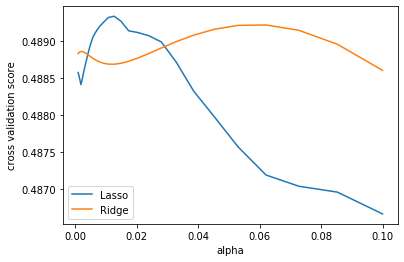

In [145]:
alphas = np.logspace(-3, -1, 30)

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.legend()

### Automatically Performing Grid Search
`sklearn.grid_search.GridSearchCV` is constructed with an estimator, as well as a dictionary of parameter values to be searched. We can find the optimal parameters this way:

In [147]:
from sklearn.model_selection import GridSearchCV
for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.06210169418915616}
Lasso: {'alpha': 0.01268961003167922}


### Built-in Hyperparameter Search
For some models within scikit-learn, cross-validation can be performed more efficiently on large datasets. In this case, a cross-validated version of the particular model is included. The cross-validated versions of `Ridge` and `Lasso` are `RidgeCV` and `LassoCV`, respectively. Parameter search on these estimators can be performed as follows:

In [148]:
from sklearn.linear_model import RidgeCV, LassoCV
for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


### Nested cross-validation
How do we measure the performance of these estimators? We have used data to set the hyperparameters, so we need to test on actually new data. We can do this by running `cross_val_score()` on our CV objects. Here there are 2 cross-validation loops going on, this is called _‘nested cross validation’_:

In [149]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.48916142454965544
LassoCV 0.48549139668647756


# Unsupervised Learning: Dimensionality Reduction and Visualization
Unsupervised learning is applied on X without y: data without labels. A typical use case is to find hidden structure in the data.

## Dimensionality Reduction: PCA